# Case Study on Predicting Heart Disease

### Objective : 

The main objective behind this notebook is to give an idea along with a workflow of Machine Learning Processes.
Starting from Getting data information to Exploratory Data Analysis, Data Manipulation, Building and then Validation of Model.


* ## Contents of the Notebook:

#### Part1: Exploratory Data Analysis(EDA)
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.
#### Part2: Data Cleaning and Feature Engineering:
1) Adding any few features if any.

2) Removing redundant features.

3) Converting features into suitable form for modeling.
#### Part3: Predictive Modeling
1) Running Basic Algorithms.

2) Cross Validation.

3) Important Features Extraction.

4) Plotting ROC Curve, Precision/Recall Curve, AUC

5) Model Comparison (Accuracy + F1 Score)


## Part1: Exploratory Data Analysis(EDA)

### Attribute Information:
The dataset contains the following features:<br>
**1. age(in years)**<br>
**2. sex:** (1 = male; 0 = female)<br>
**3. cp:** chest pain type<br>
**4. trestbps:** resting blood pressure (in mm Hg on admission to the hospital)<br>
**5. chol:** serum cholestoral in mg/dl<br>
**6. fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
**7. restecg:** resting electrocardiographic results<br>
**8. thalach:** maximum heart rate achieved<br>
**9. exang:** exercise induced angina (1 = yes; 0 = no)<br>
**10. oldpeak**: ST depression induced by exercise relative to rest<br>
**11. slope:** the slope of the peak exercise ST segment<br>
**12. ca:** number of major vessels (0-3) colored by flourosopy<br>
**13. thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
**14. target:** 1 or 0 <br>

### **Importing required libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()

### **Loading the data**

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### How many people are suffering from Heart Disease ?

Text(0.5, 1.0, 'Heart Disease')

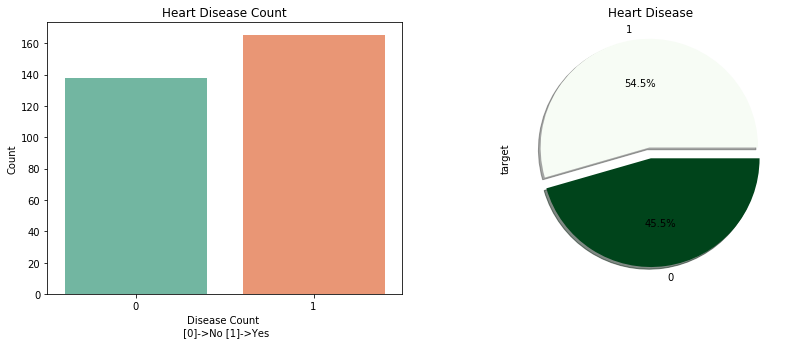

In [3]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease")

From above graph we can say that more than half of the population suffering from Heart Disease with parcentage of 54.5%. 

Let's explore more feature to get more insight from dataset

### Feature analysis

### a)->SEX (Category)

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

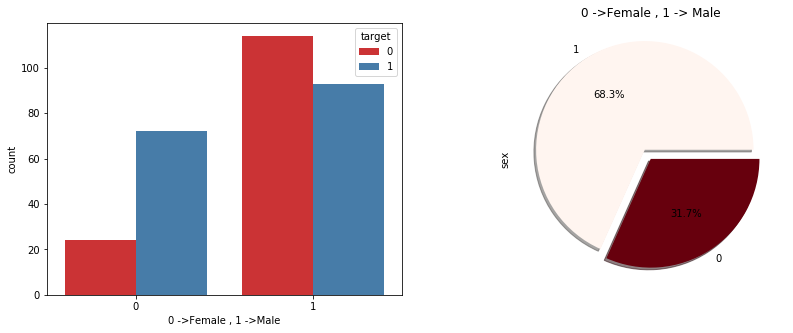

In [4]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

**This is interesting**

**Number of Women suffering from Heart Disease are more than Men** but **Men population is more than Women**. We will use these insight for our model developement.

Let's explore other feature

### b)-> fasting blood sugar (Fbs) (Category)

Text(0.5, 1.0, '0 -> fps <120 , 1 -> fps>120')

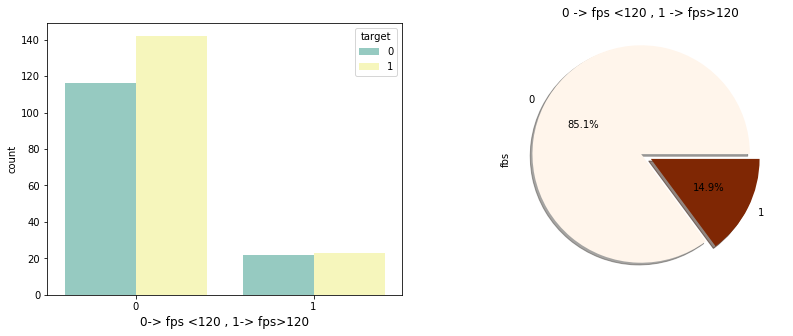

In [5]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fps <120 , 1 -> fps>120",size=12)

This is weird **People having fps < 120 have more chance of having Heart Disease than people havnig fps >120**

This insight will also be useful for our model

Let's explore more

### c) resting electrocardiographic results (values 0,1,2) (Category)

Text(0.5, 1.0, 'resting electrocardiographic')

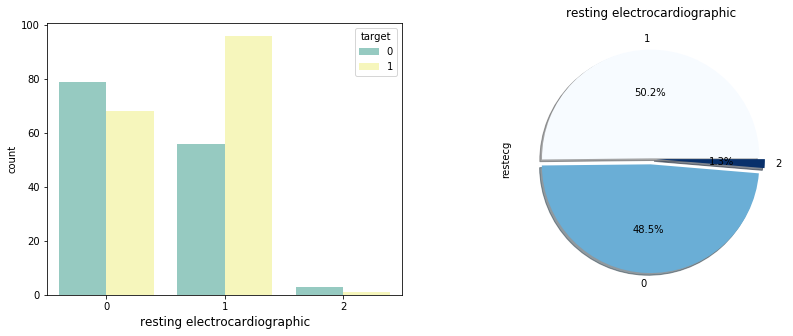

In [6]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

An electrocardiogram (ECG) is a test which measures the electrical activity of your heart to show whether or not it is working normally. An ECG records the heart's rhythm and activity on a moving strip of paper or a line on a screen.

With above graph as a refrence we can **if resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease**

### d) the slope of the peak exercise ST segment (slope)(Category)

Text(0.5, 1.0, 'peak exercise ST segment ')

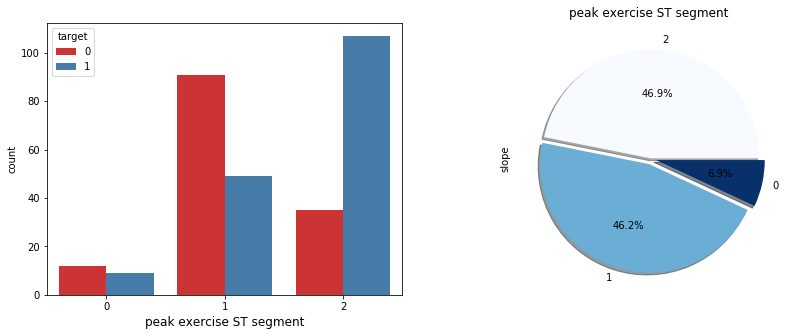

In [7]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

Feature (the peak exercise ST segment slope) has three symbolic values (flat, up sloping, downsloping)


Therefore **People having up sloping are more prone to Heart Disease than flat and downsloping**. This is useful for our model

### e)  number of major vessels colored by flourosopy (category)

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

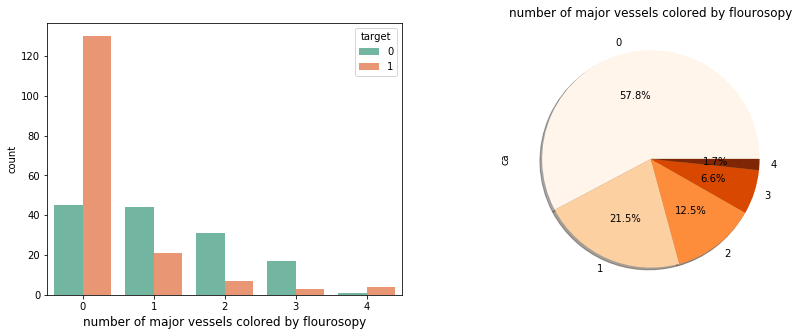

In [8]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.ca.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

Since **Fluoroscopy** use to  produce x-ray which will makes possible to see internal organs in motion. Fluoroscopy uses x-ray to produce real-time video images.

**THIS seems to be important info from data** 

### f) thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category feature)

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

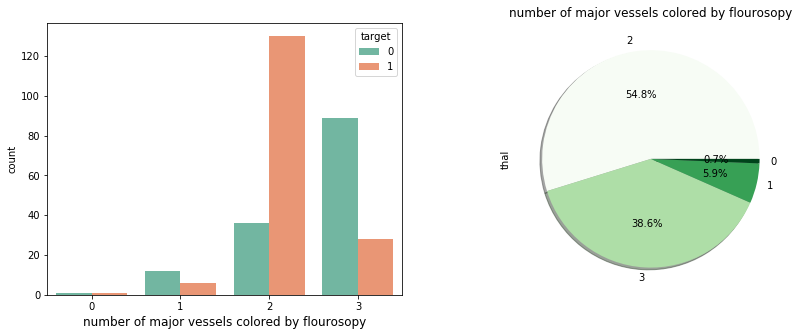

In [9]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

### g) Chest Pain (category)

Text(0.5, 1.0, 'Chest pain')

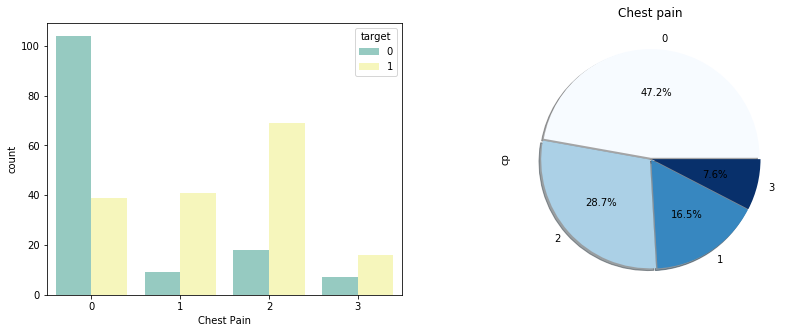

In [10]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")

4-Levels of chest pain given in data where 3 is highest

**People who are on 3rd level of chest pain are very less as compared to people who are on 2nd level of chest pain**. 
I guess **Most people died after 2nd level of chest pain**

This insight will be very usefull for our model

### Let's explore Continuous data now with categorical and ordinal data

### h) Trestbps (continuous feature)

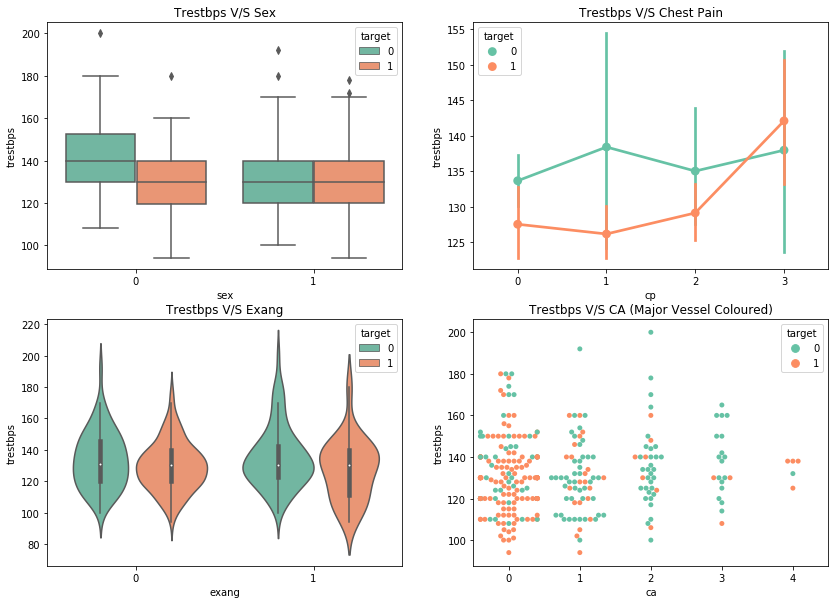

In [11]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='trestbps',data=data,x='sex',hue='target',palette='Set2',ax=ax[0,0])
ax[0,0].set_title("Trestbps V/S Sex")
sns.factorplot(y='trestbps',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set2')
ax[0,1].set_title("Trestbps V/S Chest Pain")
sns.violinplot(y='trestbps',data=data,x='exang',hue='target',ax=ax[1,0],palette='Set2')
ax[1,0].set_title("Trestbps V/S Exang")
sns.swarmplot(y='trestbps',data=data,x='ca',hue='target',ax=ax[1,1],palette='Set2')
ax[1,1].set_title("Trestbps V/S CA (Major Vessel Coloured)")
plt.close(2)

Based on above analysis we can say that Gender plays minor role with respect to Blood Pressure (trestbps). But **Chest Pain play's Vital Role** . As Chest pain increases Blood Pressure will also increases along with chances of Heart Diseases.

Lets Move to other features

### i) Cholestrol (continuous feature)

Text(0.5, 1.0, 'Cholestrol V/S Thal')

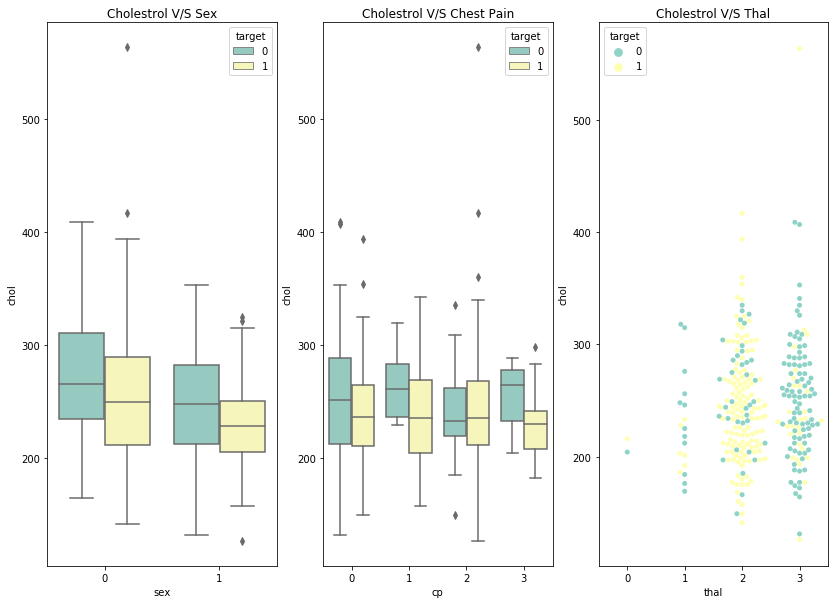

In [17]:
fig,ax=plt.subplots(1,3,figsize=(14,10))
sns.boxplot(y='chol',data=data,x='sex',hue='target',palette='Set3',ax=ax[0])
ax[0].set_title("Cholestrol V/S Sex")
sns.boxplot(y='chol',data=data,x='cp',hue='target',ax=ax[1],palette='Set3')
ax[1].set_title("Cholestrol V/S Chest Pain")
sns.swarmplot(y='chol',data=data,x='thal',hue='target',ax=ax[2],palette='Set3')
ax[2].set_title("Cholestrol V/S Thal")


Female have **higher cholestrol level** than Men. Chances of **Heart Diseases** decreases with decrease in **Cholestrol level**.

With 2nd Graph (Cholestrol V/S Chest Pain) we can say that if **cholestrol is less than 240 approx** and **Chest pain is at level 3~4 then chances of having heart diseases are higher**

### j) Oldpeak (continuous feature)

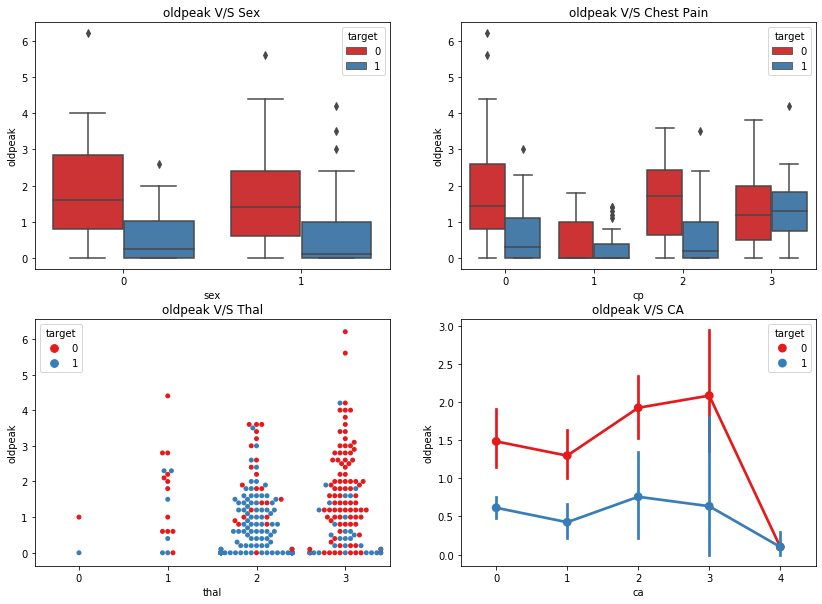

In [18]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='oldpeak',data=data,x='sex',hue='target',palette='Set1',ax=ax[0,0])
ax[0,0].set_title("oldpeak V/S Sex")
sns.boxplot(y='oldpeak',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set1')
ax[0,1].set_title("oldpeak V/S Chest Pain")
sns.swarmplot(y='oldpeak',data=data,x='thal',hue='target',ax=ax[1,0],palette='Set1')
ax[1,0].set_title("oldpeak V/S Thal")
sns.factorplot(y='oldpeak',data=data,x='ca',hue='target',ax=ax[1,1],palette='Set1')
ax[1,1].set_title("oldpeak V/S CA")
plt.close(2)

Based on above plots we can comclude that if Old peak is less then people will have more chances of **having heart diseases**

### Let's do some Advanced EDA now 

### Distribution of each features

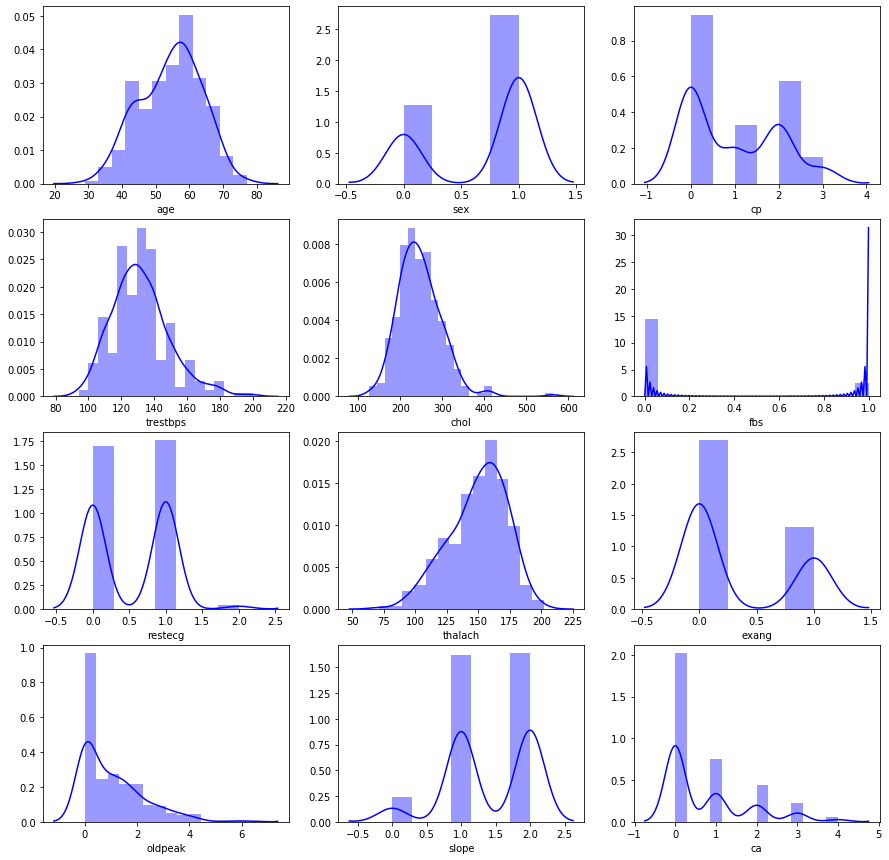

In [19]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i],kde=True, color='blue')

### PLOT WITH RESPECT TO MEAN OF EACH ROW

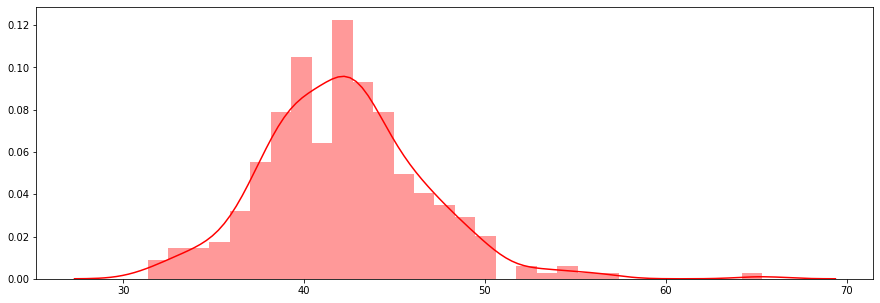

In [20]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
features = data.columns
sns.distplot(data[features].mean(axis=1),kde=True,bins=30,color='red')

### Plot with respect to Standard Deviation per Row

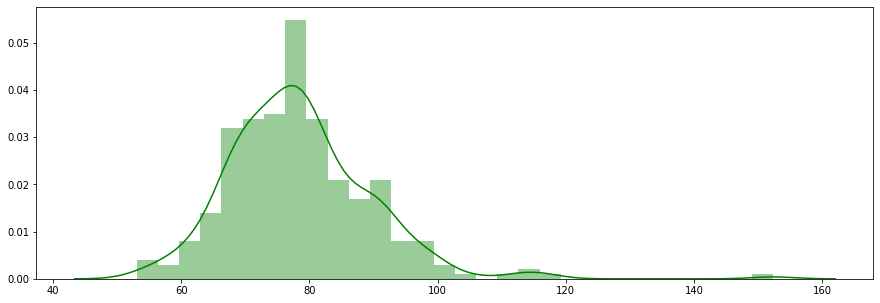

In [21]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
features = data.columns
sns.distplot(data[features].std(axis=1),kde=True,bins=30,color='green')

## Part2: Data Cleaning and Feature Engineering

### Handling Missing Data

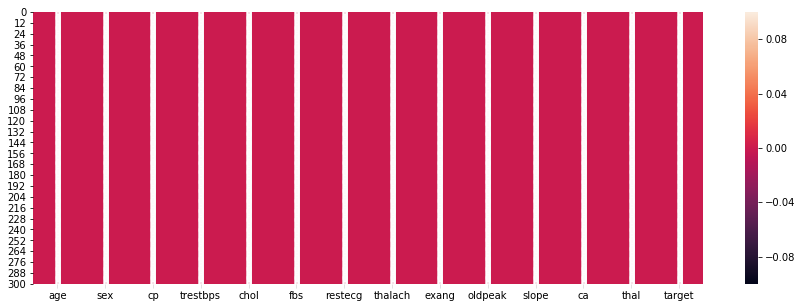

In [22]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(data.isnull(), annot=True)

THAT'S Good. **No Missing Values**

Let's see **correlation between different features**

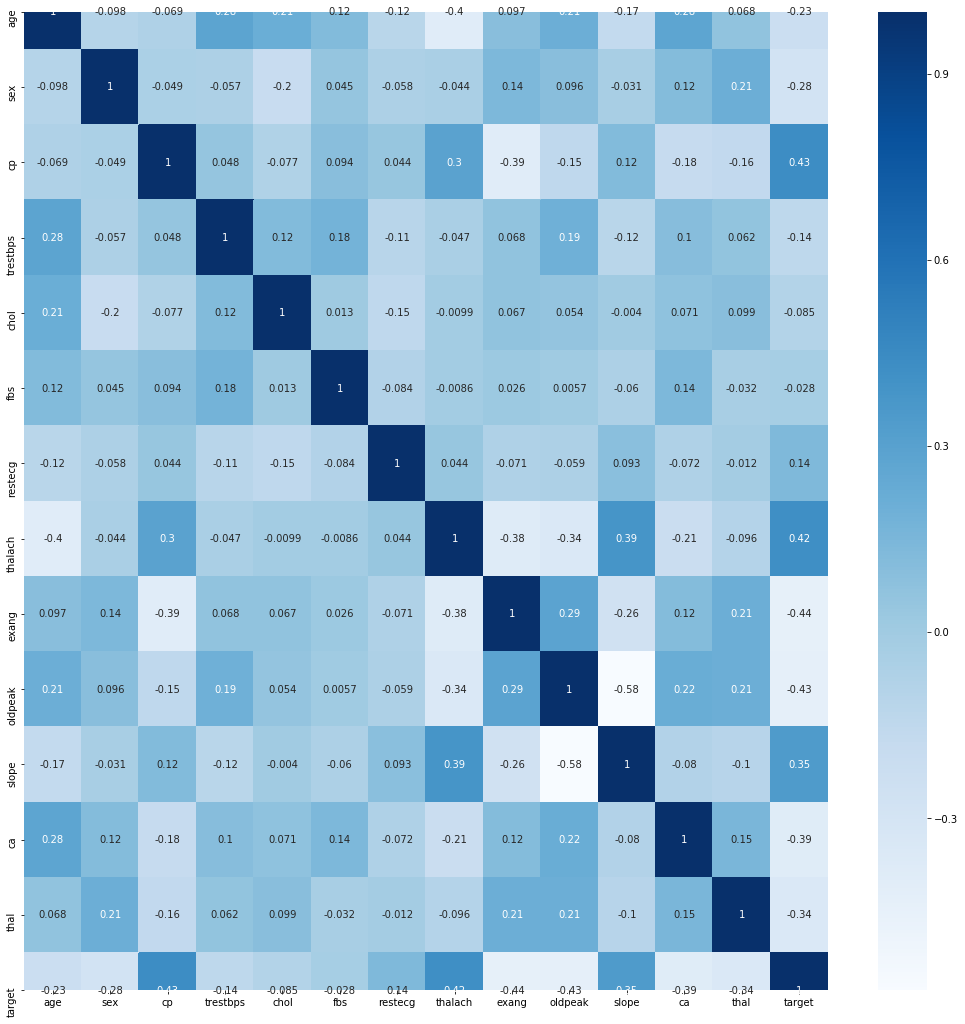

In [23]:
fig=plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot= True, cmap='Blues')

Based on above heatmap we can say **most of the features are in high correlation with each other**.

### Creating dummy variables

#### Now let's work on each feature conversion for performing one hot encoding

We use one hot encoder to perform “binarization” of the category and include it as a feature to train the model.

In [24]:
data.sex=data.sex.astype('category')
data.cp=data.cp.astype('category')
data.fbs=data.fbs.astype('category')
data.restecg=data.restecg.astype('category')
data.exang=data.exang.astype('category')
data.ca=data.ca.astype('category')
data.slope=data.slope.astype('category')
data.thal=data.thal.astype('category')

In [25]:
data_label=data['target']
del data['target']
data_label=pd.DataFrame(data_label)

In [26]:
data=pd.get_dummies(data,drop_first=True)
data.head(),data_label.head()

(   age  trestbps  chol  thalach  oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  ...  \
 0   63       145   233      150      2.3      1     0     0     1      1  ...   
 1   37       130   250      187      3.5      1     0     1     0      0  ...   
 2   41       130   204      172      1.4      0     1     0     0      0  ...   
 3   56       120   236      178      0.8      1     1     0     0      0  ...   
 4   57       120   354      163      0.6      0     0     0     0      0  ...   
 
    exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  thal_3  
 0        0        0        0     0     0     0     0       1       0       0  
 1        0        0        0     0     0     0     0       0       1       0  
 2        0        0        1     0     0     0     0       0       1       0  
 3        0        0        1     0     0     0     0       0       1       0  
 4        1        0        1     0     0     0     0       0       1       0  
 
 [5 rows x 22 columns], 

### Standardization (To bring each feature at same scale)

In [27]:
from sklearn.preprocessing import StandardScaler
data_scaled=StandardScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

In [28]:
data_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.681005,-0.444554,-0.634648,3.489114,2.394438,...,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,3.979112,-1.100763,-0.793116
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.681005,-0.444554,1.575677,-0.286606,-0.417635,...,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-1.468418,2.249444,-0.634648,-0.286606,-0.417635,...,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.681005,2.249444,-0.634648,-0.286606,-0.417635,...,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-1.468418,-0.444554,-0.634648,-0.286606,-0.417635,...,1.435481,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116


## Part3: Predictive Modeling

### Splittting data into test and train set

In [29]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.20,
                                             stratify=data_label,random_state=975456)

### Importing ML libraries

In [30]:
from sklearn.linear_model import LogisticRegression

### Evalutation metrics to check model performance

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

### Function to plot ROC and Precision Recall Curve 

In [32]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

### Creating the Model

F1 Score: 0.8115942028985507
[[20  8]
 [ 5 28]]


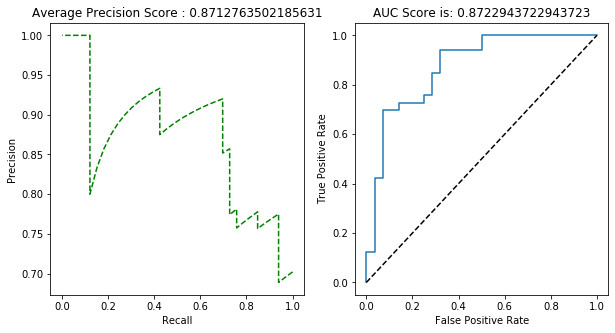

In [33]:
lr=LogisticRegression(class_weight='balanced', tol=1e-10)
lr.fit(Xtrain,Ytrain)
plotting(Ytest,lr.predict_proba(Xtest))
print("F1 Score:",f1_score(Ytest,lr.predict(Xtest)))
print(confusion_matrix(Ytest,lr.predict(Xtest)))

### FEATURE IMPORTANCE


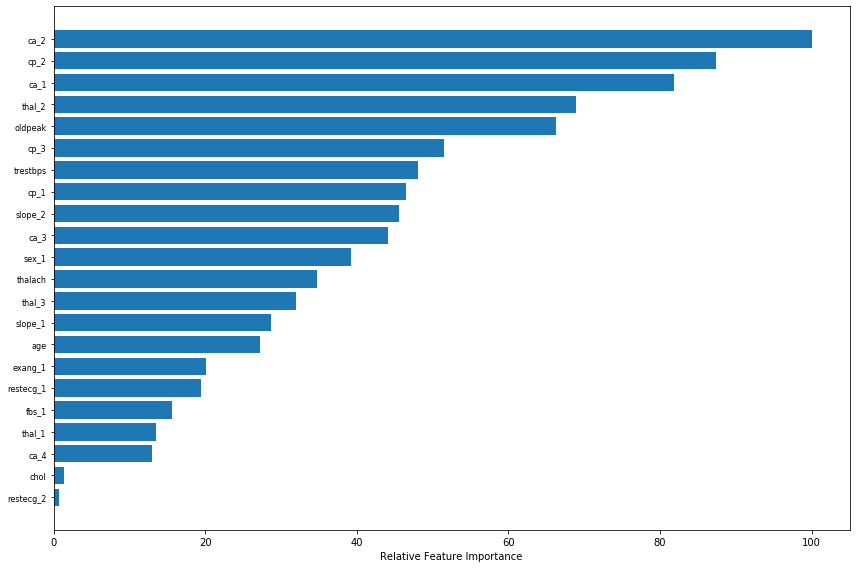

In [34]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(data_scaled.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()